In [1]:
import pandas as pd
from os import listdir
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
import random
from statistics import median
from statistics import mean
from statistics import mode
from os import listdir

In [2]:
# input_path = "../data/synoymsWithoutIncExcRelevancySorted"
input_path_1 = "../data/1_pageRank"
input_path_2 = "../data/1.1_exactWordWithoutIncExcSortedOnTheBasisOfRelevancy"
input_path_3 = "../data/1.2_exact_Inclusion_Exclusion_Final_relevancy_based_sorted"
input_path_4 = "../data/2.1_synoymsWithoutIncExcRelevancySorted"
input_path_5 = "../data/2.2_synset_Inclusion_Exclusion_Final_Relevancy_Based_Sorted"
input_path = input_path_5

In [3]:
files = listdir(input_path)
files

['hypertension safe treatments_page_rank.csv',
 'constipation safe treatments_page_rank.csv',
 'treating people already having hypertension_page_rank.csv',
 'safe treatments for asthma_pageRank.csv',
 'recommended anti-platelet doses for treating Coronary artery disease_page_rank_103.csv',
 'dietary approaches for obesity treatment_page_rank.csv',
 'haemorrhage cure_page_rank.csv',
 'antiretroviral therapy first time_pageRank.csv',
 'Dietary Therapy Epilepsies_page_rank.csv',
 'low back pain therapy workout_pageRank.csv',
 'Treating Anemia, Iron-Deficiency in CKD patients_page_rank_15.csv',
 'postoperative delirium_pageRank.csv',
 'out of hospital cardiac arrest_page_rank.csv',
 'safe treatment for Alzheimer disease_page_rank.csv',
 'managing constipation in children_pageRank.csv',
 'Hypercholesterolemia safe treatments_page_rank.csv',
 'serious sleep apnea_page_rank.csv',
 'serious Rheumatoid arthritis_pageRank.csv',
 'Outcomes of cerebrovascular accident_page_rank.csv',
 'HIV infecti

In [4]:
def plotbar(y, x_lab, y_lab, title):
    objects = ('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25')
    y_mean = [np.median(y)]*len(y)
    
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=(15, 3))
    plt.bar(y_pos, y, align='center', alpha=0.5, color='b')
    
    plt.xticks(y_pos, objects)
    
    # Plot the average line
    plt.plot(y_pos, y_mean, label='Mean', linestyle='--')
    
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    
    plt.show()
    plt.savefig("Number of Trials At each Query")
    print("Median:", y_mean[0])

In [5]:
numberOfTrialsInEachQueryList = []
for file in files:
    df = pd.read_csv(join(input_path, file))
    numberOfTrialsInEachQueryList.append(df.shape[0])
print(sorted(numberOfTrialsInEachQueryList))
print("Median:", median(numberOfTrialsInEachQueryList))
print("Mean:", mean(numberOfTrialsInEachQueryList))
print("Min:", min(numberOfTrialsInEachQueryList))
print("Max:", max(numberOfTrialsInEachQueryList))
# print("Mode:", mode(numberOfTrialsInEachQueryList))

[9, 12, 13, 15, 16, 17, 19, 23, 30, 36, 39, 39, 43, 45, 45, 53, 57, 67, 72, 95, 103, 193, 295, 311, 360]
Median: 43
Mean: 80.28
Min: 9
Max: 360


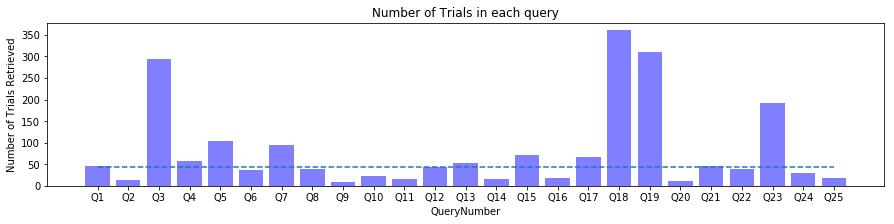

Median: 43.0


<Figure size 432x288 with 0 Axes>

In [6]:
plotbar(numberOfTrialsInEachQueryList, "QueryNumber", "Number of Trials Retrieved", "Number of Trials in each query")

In [7]:
def findOverLapForTopN(topN):
    rel_adv_overlap_num = []
    rel_adv_overlap_norm = []
    rel_rec_overlap_num = []
    rel_rec_overlap_norm = []
    rel_pop_sum_overlap_num = []
    rel_pop_sum_overlap_norm = []
    rel_pop_avg_overlap_num = []
    rel_pop_avg_overlap_norm = []
    
    adv_rec_overlap_num = []
    adv_rec_overlap_norm = []
    adv_pop_sum_overlap_num = []
    adv_pop_sum_overlap_norm = []
    adv_pop_avg_overlap_num = []
    adv_pop_avg_overlap_norm = []
    
    rec_pop_sum_overlap_num = []
    rec_pop_sum_overlap_norm = []
    rec_pop_avg_overlap_num = []
    rec_pop_avg_overlap_norm = []

    
    for file in files:
#         print(file)
        
        df = pd.read_csv(join(input_path, file))
    
        df['tot_subj_affected'] = df['tot_subj_affected'].fillna(value=0)
        df['citationSum'] = df['citationSum'].fillna(value=0)

#         rel_index = df.sort_values(by=['brief_summary_matched_count', 'official_title_matched_count', 'brief_title_matched_count', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[False, False, False, False]).index.tolist()
        rel_index = df.index.tolist()
    
        df_a = df.sample(frac=1.0, random_state=50)
        adv_index = df_a.sort_values(by=['tot_subj_affected'], ascending=[False]).index.tolist()


        rec_index = df.sort_values(by=['CompletionDate'], ascending=[False]).index.tolist()
        pop_index_sum = df.sort_values(by=['citationSum'], ascending=[False]).index.tolist()
        pop_index_avg = df.sort_values(by=['citationAvg'], ascending=[False]).index.tolist()
        

        rel_set = set(rel_index[:topN])
        adv_set = set(adv_index[:topN])
        rec_set = set(rec_index[:topN])
        pop_sum_set = set(pop_index_sum[:topN])
        pop_avg_set = set(pop_index_avg[:topN])
        
        
        rel_adv_ov_trials_set = rel_set.intersection(adv_set)
        rel_rec_ov_trials_set = rel_set.intersection(rec_set)
        rel_pop_sum_ov_trials_set = rel_set.intersection(pop_sum_set)
        rel_pop_avg_ov_trials_set = rel_set.intersection(pop_avg_set)
#         print(rel_adv_ov_trials_set)
        
        adv_rec_ov_trials_set = adv_set.intersection(rec_set)
        adv_pop_sum_ov_trials_set = adv_set.intersection(pop_sum_set)
        adv_pop_avg_ov_trials_set = adv_set.intersection(pop_avg_set)
        
        rec_pop_sum_ov_trials_set = rec_set.intersection(pop_sum_set)
        rec_pop_avg_ov_trails_set = rec_set.intersection(pop_avg_set)
        
        rel_adv_overlap_num.append(len(rel_adv_ov_trials_set))
        rel_rec_overlap_num.append(len(rel_rec_ov_trials_set))
        rel_pop_sum_overlap_num.append(len(rel_pop_sum_ov_trials_set))
        rel_pop_avg_overlap_num.append(len(rel_pop_avg_ov_trials_set))
        
        adv_rec_overlap_num.append(len(adv_rec_ov_trials_set))
        adv_pop_sum_overlap_num.append(len(adv_pop_sum_ov_trials_set))
        adv_pop_avg_overlap_num.append(len(adv_pop_avg_ov_trials_set))
        
        rec_pop_sum_overlap_num.append(len(rec_pop_sum_ov_trials_set))
        rec_pop_avg_overlap_num.append(len(rec_pop_avg_ov_trails_set))
    plotbar(rel_adv_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Relevancy and Adversity")
    plotbar(rel_rec_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Relevancy and Recency")
    plotbar(rel_pop_sum_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Relevancy and Popularity sum")
#     plotbar(rel_pop_avg_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Relevancy and Popularity avg")
    
    plotbar(adv_rec_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Adversity and Recency avg")
    plotbar(adv_pop_sum_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Adversity and Popularity sum")
#     plotbar(adv_pop_avg_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Adversity and Popularity Average")
    
    plotbar(rec_pop_sum_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Recency and Popularity sum")
#     plotbar(rec_pop_avg_overlap_num, "Query", "NumberOfTrialsOverlapped", "Number of Trials Overlapped in Recency and Popularity avg")
    print(topN, median(rel_adv_overlap_num), median(rel_rec_overlap_num), median(rel_pop_sum_overlap_num))
    print(median(rel_adv_overlap_num), topN, median(adv_rec_overlap_num), median(adv_pop_sum_overlap_num))
    print(median(rel_rec_overlap_num), median(adv_rec_overlap_num), topN, median(rec_pop_sum_overlap_num))
    print(median(rel_pop_sum_overlap_num), median(adv_pop_sum_overlap_num), median(rec_pop_sum_overlap_num), topN)

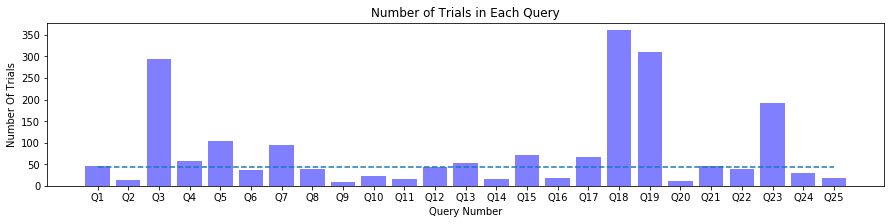

Median: 43.0


<Figure size 432x288 with 0 Axes>

In [8]:
plotbar(numberOfTrialsInEachQueryList, "Query Number", "Number Of Trials", "Number of Trials in Each Query")

### OverLap between Top 10

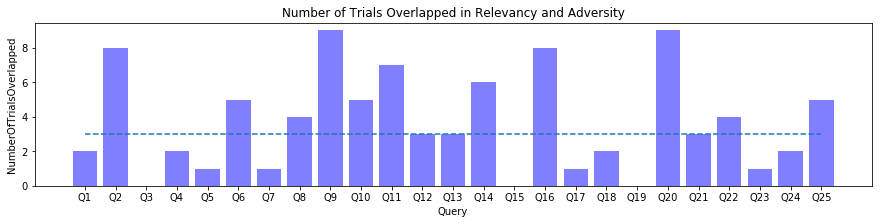

Median: 3.0


<Figure size 432x288 with 0 Axes>

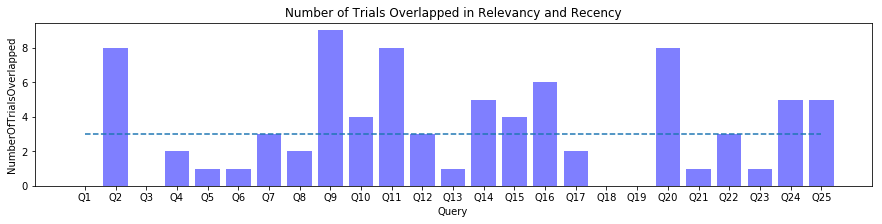

Median: 3.0


<Figure size 432x288 with 0 Axes>

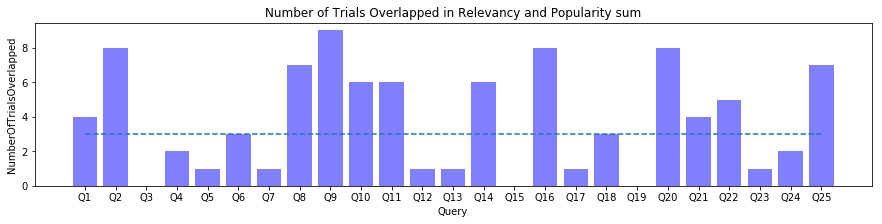

Median: 3.0


<Figure size 432x288 with 0 Axes>

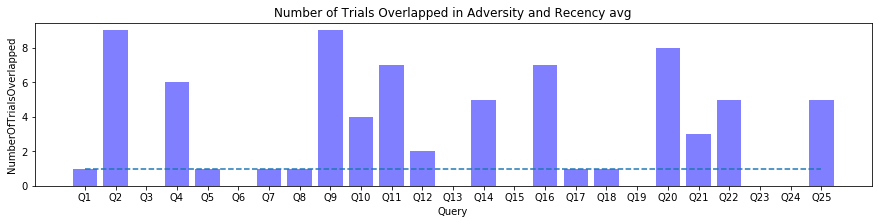

Median: 1.0


<Figure size 432x288 with 0 Axes>

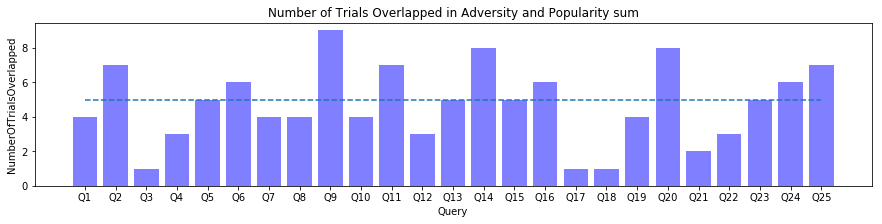

Median: 5.0


<Figure size 432x288 with 0 Axes>

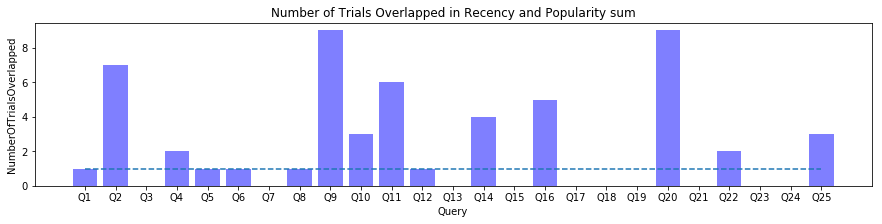

Median: 1.0
10 3 3 3
3 10 1 5
3 1 10 1
3 5 1 10


<Figure size 432x288 with 0 Axes>

In [9]:
findOverLapForTopN(10)

### Overlap between 20

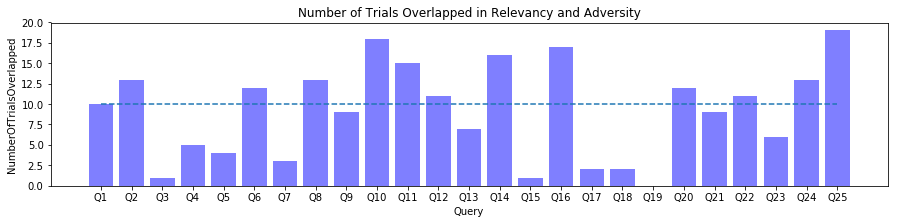

Median: 10.0


<Figure size 432x288 with 0 Axes>

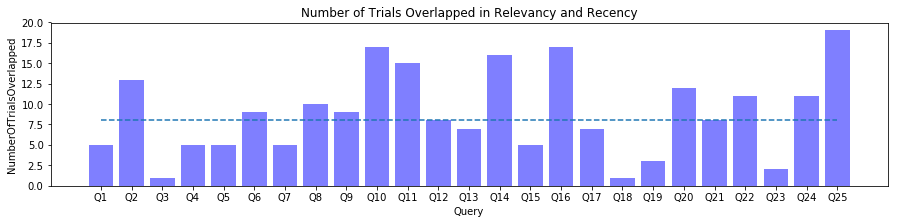

Median: 8.0


<Figure size 432x288 with 0 Axes>

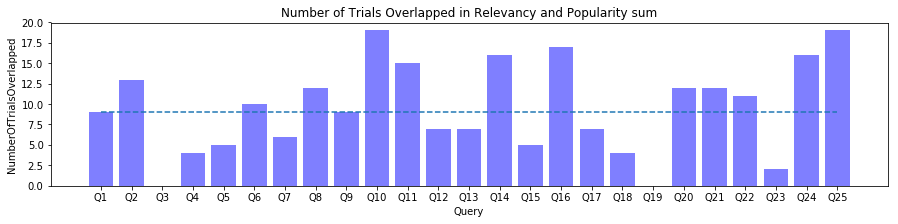

Median: 9.0


<Figure size 432x288 with 0 Axes>

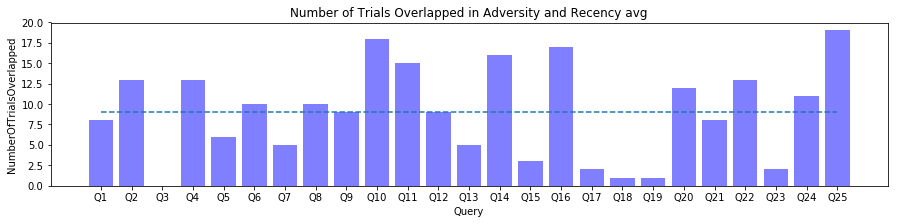

Median: 9.0


<Figure size 432x288 with 0 Axes>

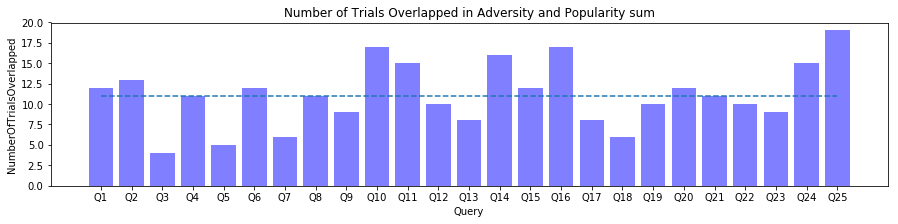

Median: 11.0


<Figure size 432x288 with 0 Axes>

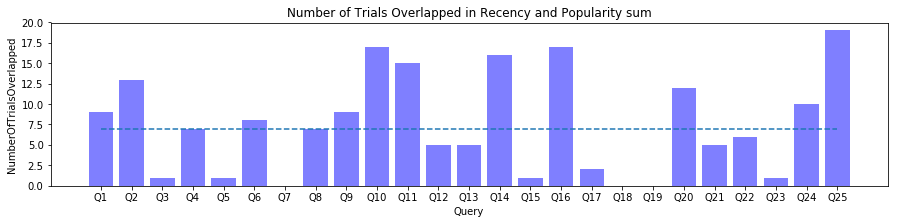

Median: 7.0
20 10 8 9
10 20 9 11
8 9 20 7
9 11 7 20


<Figure size 432x288 with 0 Axes>

In [10]:
findOverLapForTopN(20)

### Overlap Between Top 50

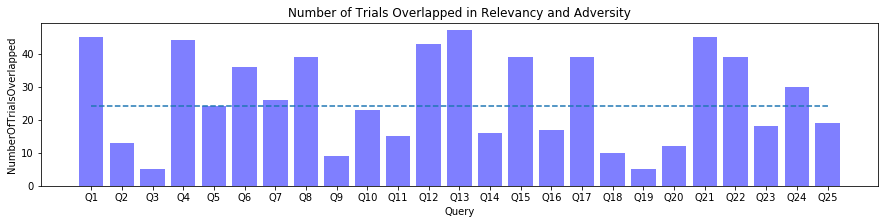

Median: 24.0


<Figure size 432x288 with 0 Axes>

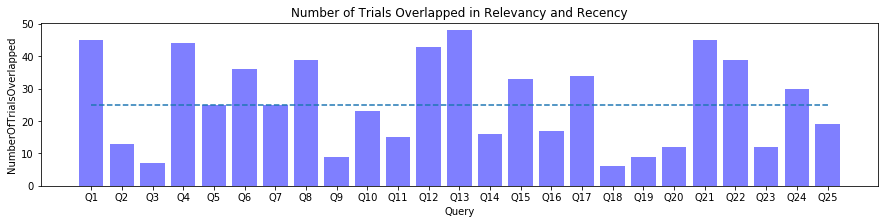

Median: 25.0


<Figure size 432x288 with 0 Axes>

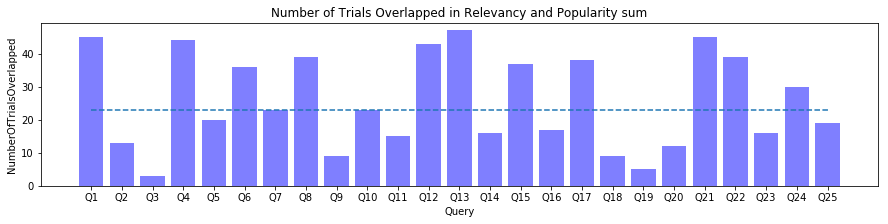

Median: 23.0


<Figure size 432x288 with 0 Axes>

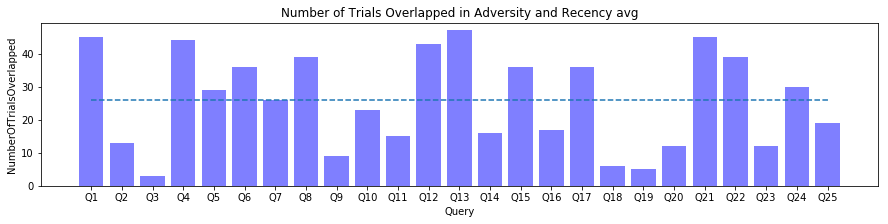

Median: 26.0


<Figure size 432x288 with 0 Axes>

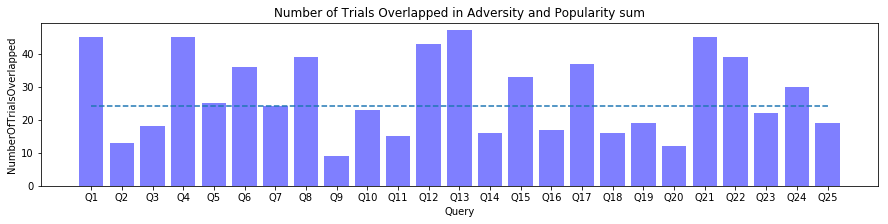

Median: 24.0


<Figure size 432x288 with 0 Axes>

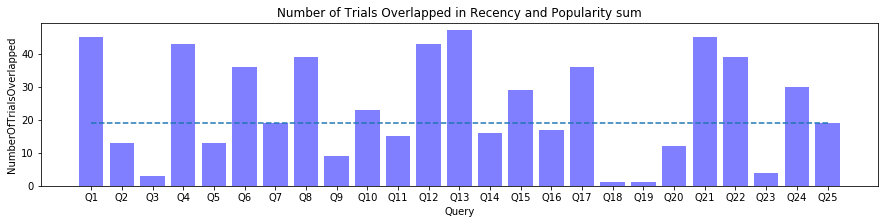

Median: 19.0
50 24 25 23
24 50 26 24
25 26 50 19
23 24 19 50


<Figure size 432x288 with 0 Axes>

In [11]:
findOverLapForTopN(50)

### Overlap Betweeen TOp 100

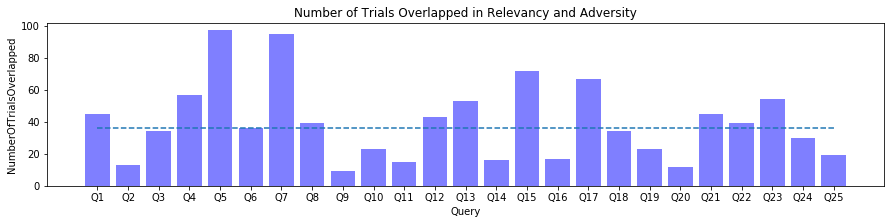

Median: 36.0


<Figure size 432x288 with 0 Axes>

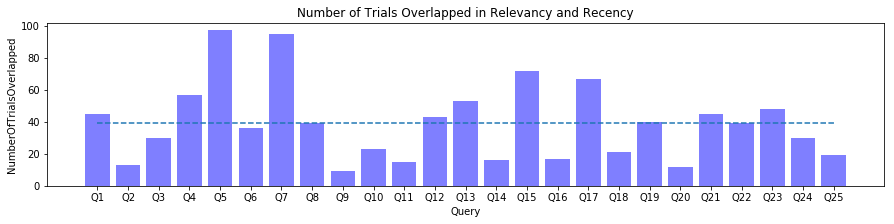

Median: 39.0


<Figure size 432x288 with 0 Axes>

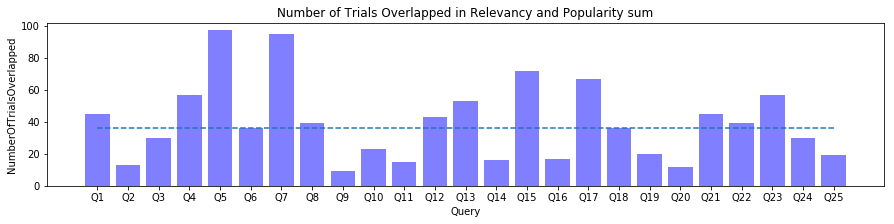

Median: 36.0


<Figure size 432x288 with 0 Axes>

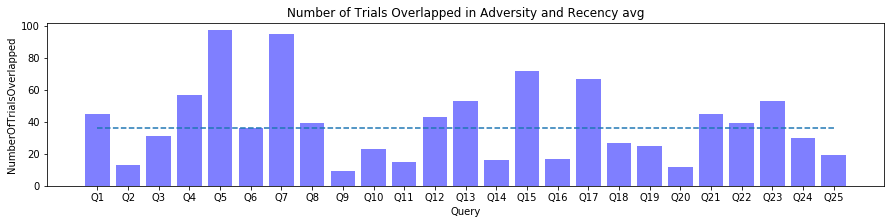

Median: 36.0


<Figure size 432x288 with 0 Axes>

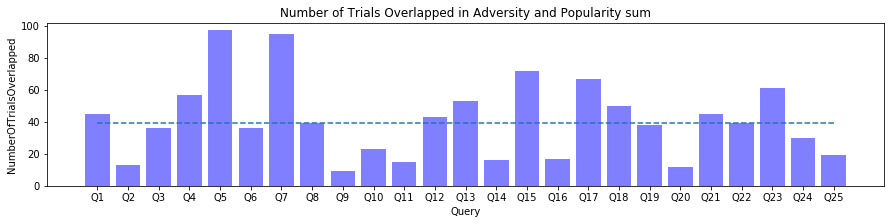

Median: 39.0


<Figure size 432x288 with 0 Axes>

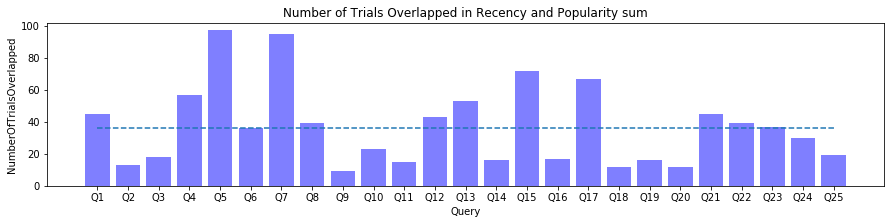

Median: 36.0
100 36 39 36
36 100 36 39
39 36 100 36
36 39 36 100


<Figure size 432x288 with 0 Axes>

In [12]:
findOverLapForTopN(100)